<a href="https://colab.research.google.com/github/Vigash14120/CNN-TRAIL/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
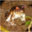

In [ ]:
x_train[0]

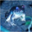

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[0])

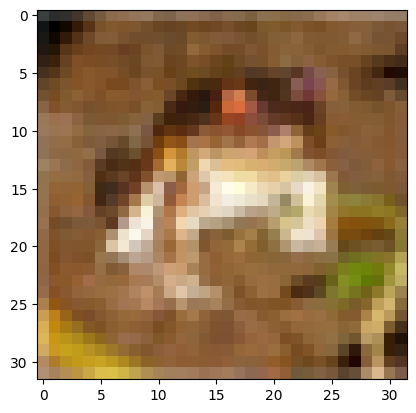

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
y_train[0] ####frog

array([6], dtype=uint8)

In [ ]:
import numpy as np
np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
len(label)

10

Text(0.5, 1.0, 'horse')

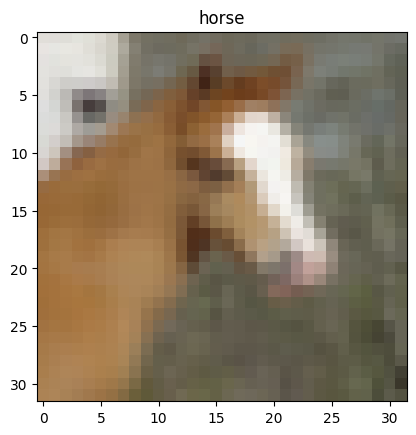

In [ ]:
i = np.random.randint(1,50000)
op = label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(op)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
cnn2 = keras.models.Sequential()
cnn2.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn2.add(keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
cnn2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
cnn2.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(128,activation='relu'))
cnn2.add(keras.layers.Dropout(0.3))
cnn2.add(keras.layers.Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,738 (553.66 KB)

 Trainable params: 141,738 (553.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(3*3*32*128)+128

36992

In [ ]:
cnn2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn2.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.2763 - loss: 1.9326 - val_accuracy: 0.4420 - val_loss: 1.5152
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4750 - loss: 1.4411 - val_accuracy: 0.5563 - val_loss: 1.2564
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5453 - loss: 1.2678 - val_accuracy: 0.5850 - val_loss: 1.1538
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5828 - loss: 1.1623 - val_accuracy: 0.6133 - val_loss: 1.0784
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6109 - loss: 1.1003 - val_accuracy: 0.6351 - val_loss: 1.0258
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6308 - loss: 1.0427 - val_accuracy: 0.6398 - val_loss: 1.0054
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6522 - loss: 0.9851 - val_accuracy: 0.6555 - val_loss: 0.9746
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6611 - loss: 0.9587 - val_accuracy: 

<Axes: >

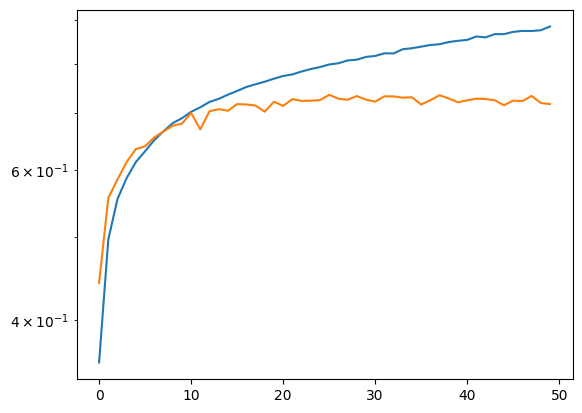

In [ ]:
import pandas as pd
pd.Series(history.history['accuracy']).plot(logy=True)
pd.Series(history.history['val_accuracy']).plot(logy=True)



<Axes: >

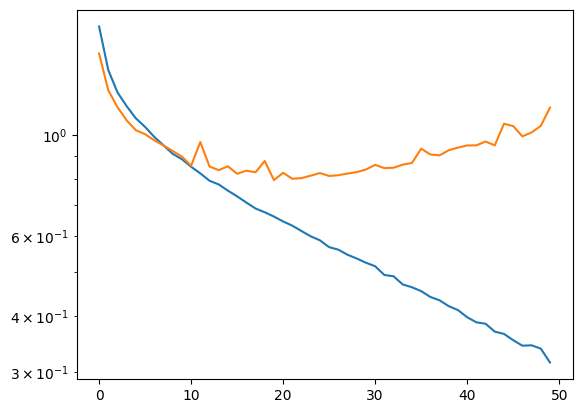

In [ ]:
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)

In [ ]:
import numpy as np
a = np.arange(1,100)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])